# Experimento Accesos de Memoria

### Compilamos

In [1]:
#RECOMENDAMOS CORRER EN CONSOLA, TIENE MUCHO OUTPUT
!cd .. && make clean && ./build_experimentos.sh

rm -fr build/*
mkdir -p build
make -C helper
make[1]: Entering directory '/home/mauro/Documents/o2-tp2-2020-c2/src/helper'
cc -ggdb -Wall -Wno-unused-parameter -Wextra -std=c99 -no-pie -pedantic -m64 -O0 -march=native -c -o ../build/libbmp.o libbmp.c
cc -ggdb -Wall -Wno-unused-parameter -Wextra -std=c99 -no-pie -pedantic -m64 -O0 -march=native -c -o ../build/imagenes.o imagenes.c
cc -ggdb -Wall -Wno-unused-parameter -Wextra -std=c99 -no-pie -pedantic -m64 -O0 -march=native -c -o ../build/utils.o utils.c
cc -ggdb -Wall -Wno-unused-parameter -Wextra -std=c99 -no-pie -pedantic -m64 -O0 -march=native bmpdiff.c ../build/libbmp.o ../build/imagenes.o ../build/utils.o -o ../build/bmpdiff
make[1]: Leaving directory '/home/mauro/Documents/o2-tp2-2020-c2/src/helper'
make -C filters
make[1]: Entering directory '/home/mauro/Documents/o2-tp2-2020-c2/src/filters'
cc -ggdb -Wall -Wno-unused-parameter -Wextra -no-pie -pedantic -m64 -O0 -march=native -c -o ../build/ColorBordes.o ColorBordes.c
cc -ggdb -

### Leemos los logs

In [1]:
ASM_PixeladoDiferencial = {
    '400x300':[], '800x600':[],  '1600x1200':[], '1280x960':[], '256x128':[], '128x64':[], '1024x768':[],
}
ASM_PixeladoDiferencial_AccesosMemoria = {
    '400x300':[], '800x600':[],  '1600x1200':[], '1280x960':[], '256x128':[], '128x64':[], '1024x768':[],
}
ASM_PixeladoDiferencial_AccesosMemoriaClFlush = {
    '400x300':[], '800x600':[],  '1600x1200':[], '1280x960':[], '256x128':[], '128x64':[], '1024x768':[],
}
ASM_PixeladoDiferencial_AccesosMemoriaClFlush2 = {
    '400x300':[], '800x600':[],  '1600x1200':[], '1280x960':[], '256x128':[], '128x64':[], '1024x768':[],
}
labels = ['128x64', '256x128', '400x300', '800x600', '1024x768', '1280x960', '1600x1200']

f = open(f'../log/ASM_ROL_PixeladoDiferencial.log', "r")
seguir = True
while seguir:
    for x in labels:
        l = f.readline().rstrip("\n")
        if not l:
            seguir = False
            break
        ASM_PixeladoDiferencial[x].append(float(l.split('\t')[8]))
    
f = open(f'../log/ASM_AM_PixeladoDiferencial.log', "r")
seguir = True
while seguir:
    for x in labels:
        l = f.readline().rstrip("\n")
        if not l:
            seguir = False
            break
        ASM_PixeladoDiferencial_AccesosMemoria[x].append(float(l.split('\t')[8]))
        
f = open(f'../log/ASM_AMCLFLUSH_PixeladoDiferencial.log', "r")
seguir = True
while seguir:
    for x in labels:
        l = f.readline().rstrip("\n")
        if not l:
            seguir = False
            break
        ASM_PixeladoDiferencial_AccesosMemoriaClFlush[x].append(float(l.split('\t')[8]))

f = open(f'../log/ASM_AMCLFLUSH2_PixeladoDiferencial.log', "r")
seguir = True
while seguir:
    for x in labels:
        l = f.readline().rstrip("\n")
        if not l:
            seguir = False
            break
        ASM_PixeladoDiferencial_AccesosMemoriaClFlush2[x].append(float(l.split('\t')[8]))

In [2]:
import numpy as np
asm1 = [] 
asm2 = [] 
asm3 = [] 
asm4 = [] 
asm1err = []
asm2err = []
asm3err = []
asm4err = []
for x in labels:
    asm1.append(2*np.mean(ASM_PixeladoDiferencial[x]))
    asm2.append(2*np.mean(ASM_PixeladoDiferencial_AccesosMemoria[x]))
    asm3.append(2*np.mean(ASM_PixeladoDiferencial_AccesosMemoriaClFlush[x]))
    asm4.append(2*np.mean(ASM_PixeladoDiferencial_AccesosMemoriaClFlush2[x]))
    asm1err.append(2*np.std(ASM_PixeladoDiferencial[x]))
    asm2err.append(2*np.std(ASM_PixeladoDiferencial_AccesosMemoria[x]))
    asm3err.append(2*np.std(ASM_PixeladoDiferencial_AccesosMemoriaClFlush[x]))
    asm4err.append(2*np.std(ASM_PixeladoDiferencial_AccesosMemoriaClFlush2[x]))

### Graficamos

In [3]:
import matplotlib.pyplot as plt
from functools import reduce 
plt.rcParams['figure.figsize'] = [18, 8]

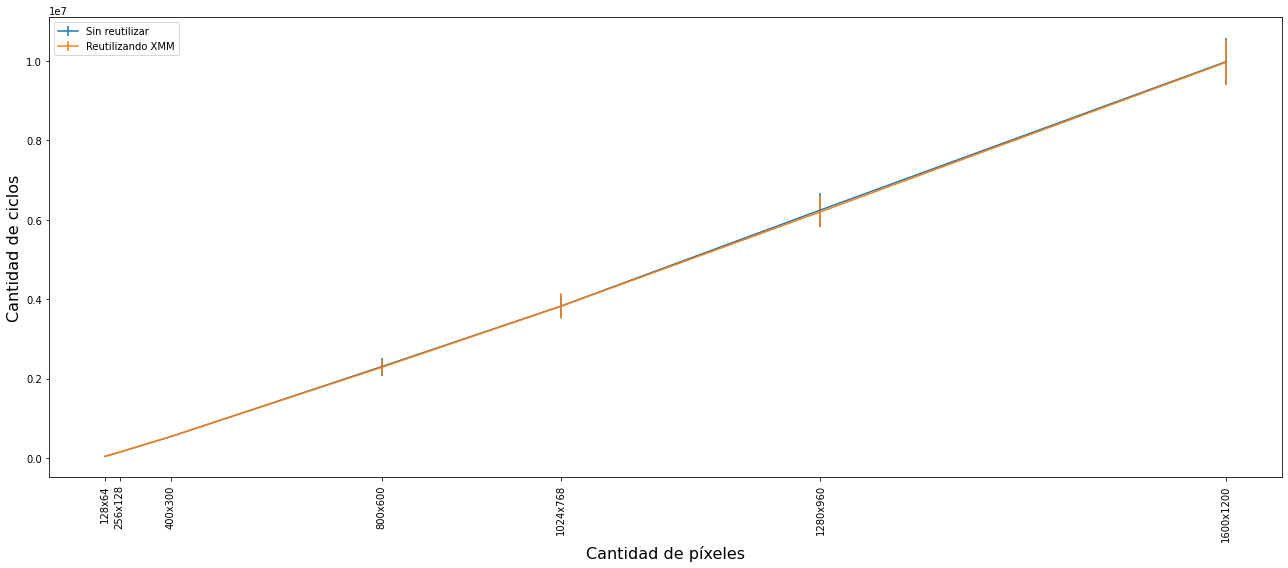

In [5]:
labelsSizes = [reduce(lambda x,y : x*y, map(int,label.split('x'))) for label in labels]
plt.errorbar(labelsSizes, asm1, yerr=asm1err, label='Sin reutilizar')
plt.errorbar(labelsSizes, asm2, yerr=asm2err, label='Reutilizando XMM')
plt.xticks(labelsSizes, labels, rotation=90, fontsize=10)
plt.legend(loc="upper left")
plt.xlabel('Cantidad de píxeles', fontsize=16)
plt.ylabel('Cantidad de ciclos', fontsize=16)
plt.tight_layout()
plt.show()

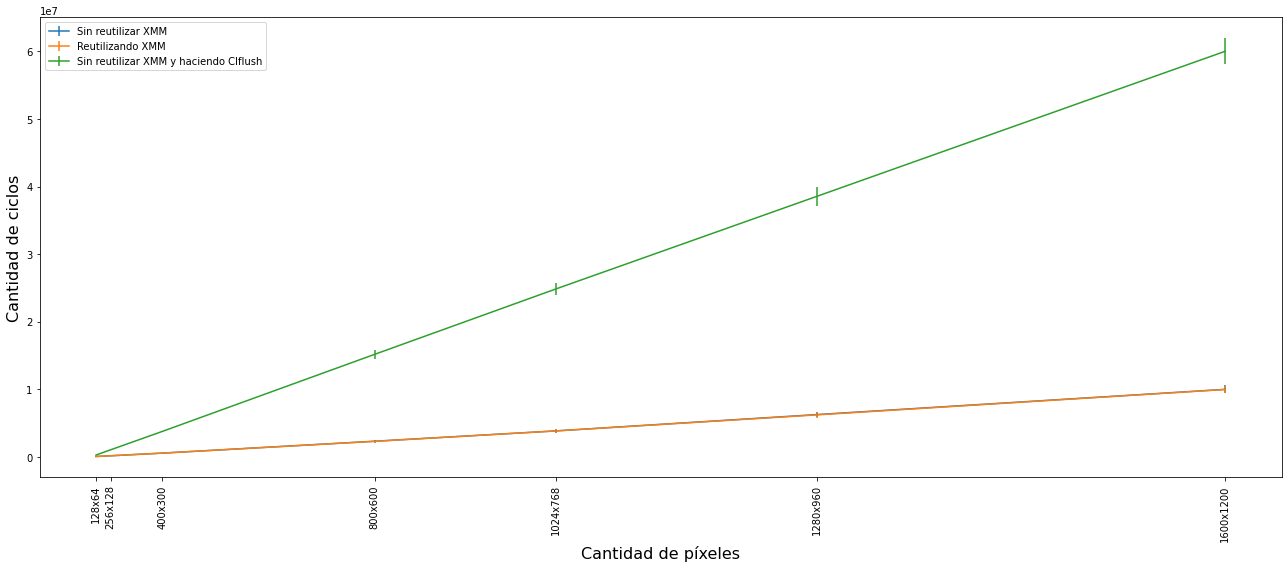

In [7]:
labelsSizes = [reduce(lambda x,y : x*y, map(int,label.split('x'))) for label in labels]
plt.errorbar(labelsSizes, asm1, yerr=asm1err, label='Sin reutilizar XMM')
plt.errorbar(labelsSizes, asm2, yerr=asm2err, label='Reutilizando XMM')
plt.errorbar(labelsSizes, asm3, yerr=asm3err, label='Sin reutilizar XMM y haciendo Clflush')
plt.xticks(labelsSizes, labels, rotation=90, fontsize=10)
plt.legend(loc="upper left")
plt.xlabel('Cantidad de píxeles', fontsize=16)
plt.ylabel('Cantidad de ciclos', fontsize=16)
plt.tight_layout()
plt.show()

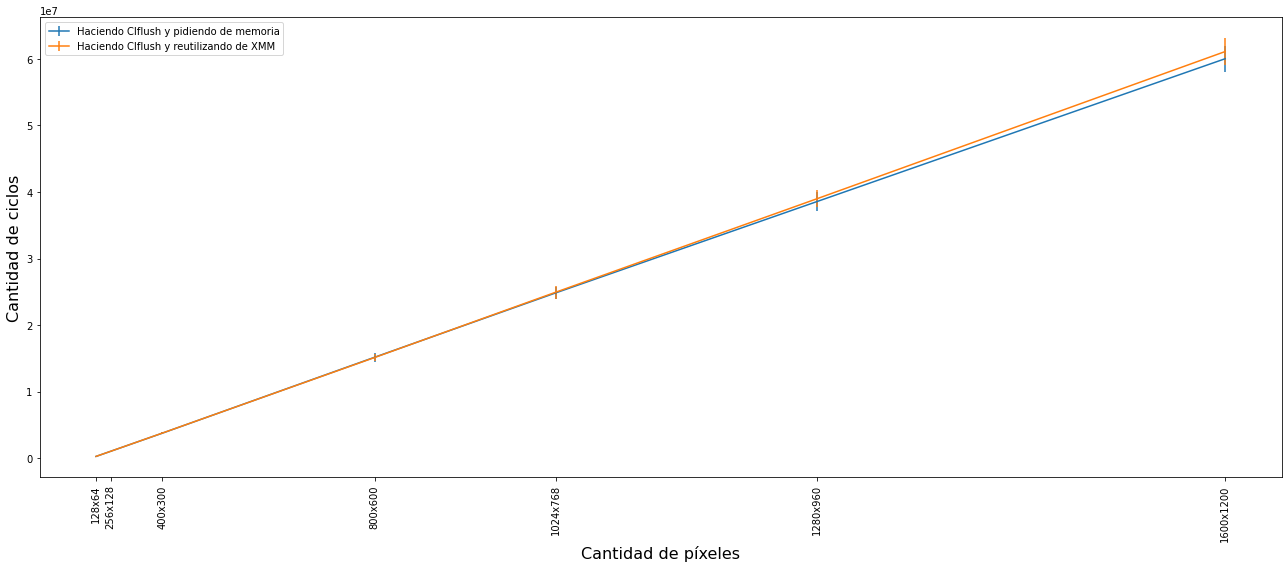

In [9]:
labelsSizes = [reduce(lambda x,y : x*y, map(int,label.split('x'))) for label in labels]
plt.errorbar(labelsSizes, asm3, yerr=asm3err, label='Haciendo Clflush y pidiendo de memoria')
plt.errorbar(labelsSizes, asm4, yerr=asm4err, label='Haciendo Clflush y reutilizando de XMM')
plt.xticks(labelsSizes, labels, rotation=90, fontsize=10)
plt.legend(loc="upper left")
plt.xlabel('Cantidad de píxeles', fontsize=16)
plt.ylabel('Cantidad de ciclos', fontsize=16)
plt.tight_layout()
plt.show()